# Import Relevant libraries

In [302]:
import numpy as np
import tensorflow as tf
from numpy import genfromtxt
import matplotlib.pyplot as plt
np.random.seed(0) # please do not remove this line
tf.random.set_seed(0)
data = genfromtxt('titanic_modified_dataset.csv', delimiter=',', skip_header=1)

# shuffle
idx = np.arange(data.shape[0])
np.random.shuffle(idx)
data = data[idx]

N = data.shape[0]
X, y = data[:, 1:-1], data[:, -1]

intercept = np.ones((X.shape[0], 1))
X_b = np.concatenate((X, intercept), axis=1)

In [303]:

TRAIN_SIZE = 0.7
VAL_SIZE = 0.2
#TEST_SIZE = 0.1
TRAIN_SAMPLES = int(TRAIN_SIZE * data.shape[0])
VAL_SAMPLES = TRAIN_SAMPLES + int(VAL_SIZE * data.shape[0])

X_train, y_train = X_b[:TRAIN_SAMPLES], y[:TRAIN_SAMPLES]
X_val, y_val = X_b[TRAIN_SAMPLES:VAL_SAMPLES], y[TRAIN_SAMPLES:VAL_SAMPLES]
X_test, y_test = X_b[VAL_SAMPLES:], y[VAL_SAMPLES:]

print(X_train.shape, X_test.shape)

(623, 9) (90, 9)


# Train

Epoch: 10, Training log loss: 0.797
Epoch: 20, Training log loss: 0.781
Epoch: 30, Training log loss: 0.780
Epoch: 40, Training log loss: 0.779
Epoch: 50, Training log loss: 0.777
Epoch: 60, Training log loss: 0.776
Epoch: 70, Training log loss: 0.775
Epoch: 80, Training log loss: 0.774
Epoch: 90, Training log loss: 0.772


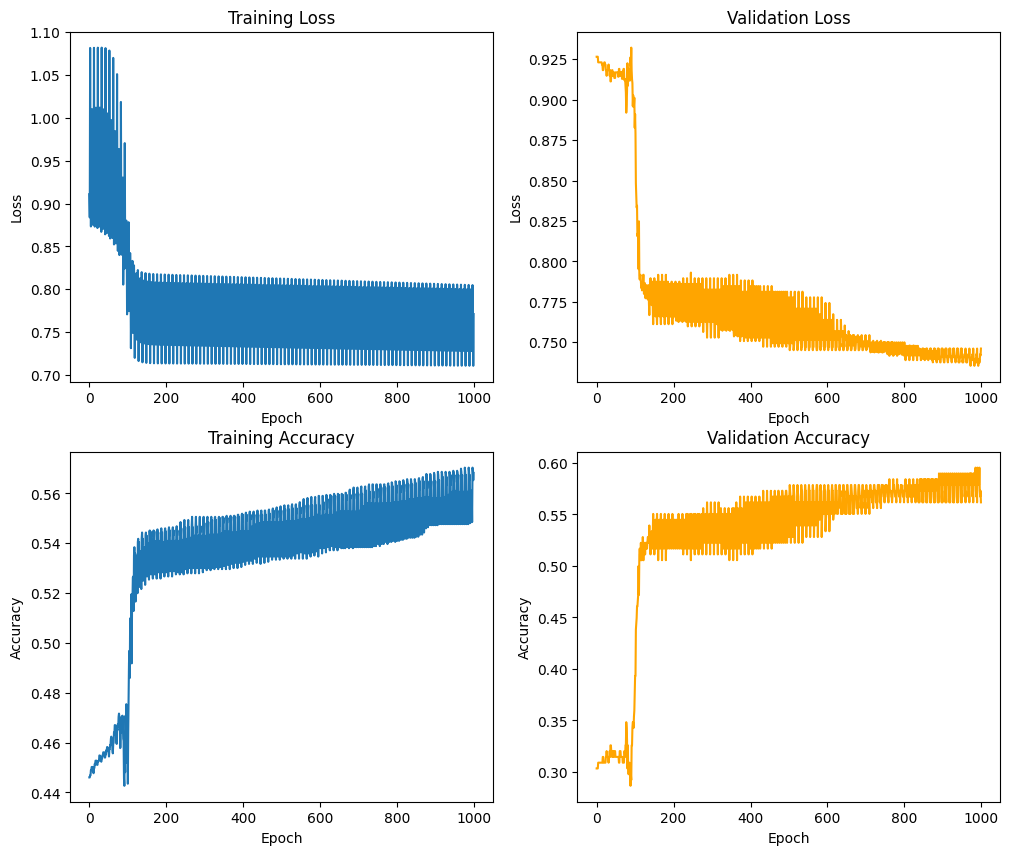

In [304]:

def sigmoid_function(z):
    return 1 / (1 + np.exp(-z))

def loss_function(y_hat, y):   
    ce = tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=y_hat)  
    return tf.reduce_mean(ce)

def predict(X, theta):
    z = tf.matmul(X, theta)   
    y_hat = tf.sigmoid(z) 
    return y_hat

def compute_gradient(X, y, y_hat):
    return np.dot(X.T, (y_hat - y)) / y.size

learning_rate = 0.001
epochs = 100
batch_size = 64 #X_train.shape[0]


training_accuracies = []
training_losses = []
val_accuracies = []
val_losses = []
y_val = y_val.reshape(y_val.shape[0],1)

def mini_batch_gradient_descent():    
    theta = tf.Variable(np.random.randn(9, 1), dtype=tf.float64)    
    
    for epoch in range(epochs):        
        for i in range(0, X_train.shape[0], batch_size):
            X_batch = X_train[i:i+batch_size]
            y_batch = y_train[i:i+batch_size]
            y_batch = y_batch.reshape(y_batch.shape[0],1)

            with tf.GradientTape() as t:
                # compute output
                y_batch_hat = predict(X_batch, theta)

                # compute loss
                training_loss = loss_function(y_batch_hat, y_batch)
            
            # compute mean of gradient
            dtheta = compute_gradient(X_batch, y_batch, y_batch_hat)
            # gradient        
            
            # update
            theta.assign_sub(learning_rate*dtheta)            

            # accuracy for training
            training_losses.append(training_loss)             
            
            y_hat = tf.round(predict(X_train, theta))
            training_acc = (y_hat == y_train)
            training_acc = training_acc.numpy().mean()
            training_accuracies.append(training_acc)
            
            y_val_hat = tf.round(predict(X_val, theta))
            val_loss = loss_function(y_val_hat, y_val)
            val_losses.append(val_loss) 
           
            val_acc = (y_val_hat == y_val)
            val_acc = val_acc.numpy().mean()
            val_accuracies.append(val_acc)
        if epoch % 10 == 0 and epoch != 0:
            print(f"Epoch: {epoch}, Training log loss: {training_loss:.3f}")

    return training_losses, val_losses,training_accuracies, val_accuracies

training_losses, val_losses,training_accuracies, val_accuracies  = mini_batch_gradient_descent()

fig, ax = plt.subplots(2, 2, figsize=(12, 10))
ax[0, 0].plot(training_losses)
ax[0, 0].set(xlabel='Epoch', ylabel='Loss')
ax[0, 0].set_title('Training Loss')

ax[0, 1].plot(val_losses, 'orange')
ax[0, 1].set(xlabel='Epoch', ylabel='Loss')
ax[0, 1].set_title('Validation Loss')

ax[1, 0].plot(training_accuracies)
ax[1, 0].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 0].set_title('Training Accuracy')

ax[1, 1].plot(val_accuracies, 'orange')
ax[1, 1].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 1].set_title('Validation Accuracy')

plt.show()

In [305]:
# Best loss and accuracy train after 1 epoch with batch_size = 64: 0.8732901957048388 0.45023432930803936
print(np.min(training_losses), np.max(training_accuracies))

0.7108768371294416 0.5703438805139528


In [306]:
# Best loss and accuracy train after 100 epochs with batch_size = 64: 0.7108768371294416 0.5703438805139528
print(np.min(training_losses), np.max(training_accuracies))

0.7108768371294416 0.5703438805139528
